## FacetGrid

Multi-plot grid for plotting conditional relationships.
This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

It can also represent levels of a third variable with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy

import warnings;
warnings.filterwarnings('ignore')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


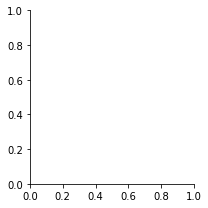

In [3]:
sns.FacetGrid(tips);

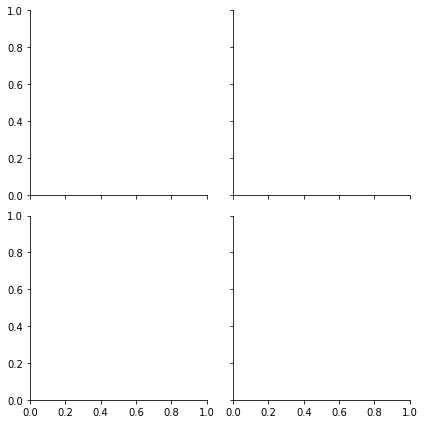

In [4]:
sns.FacetGrid(tips, col="time", row="sex");

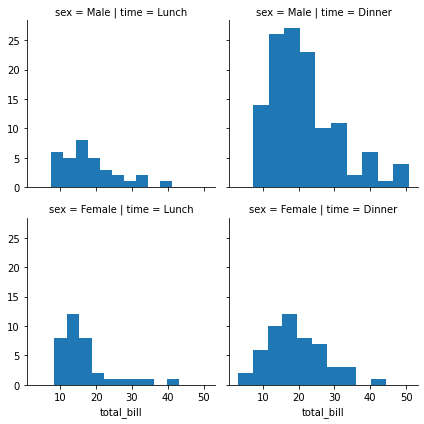

In [5]:
g = sns.FacetGrid(data = tips, col="time", row="sex")
g.map(plt.hist, "total_bill")

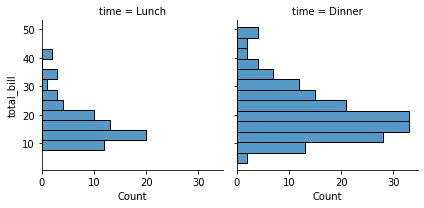

In [13]:
g = sns.FacetGrid(tips, col='time')
g.map_dataframe(sns.histplot, y='total_bill');

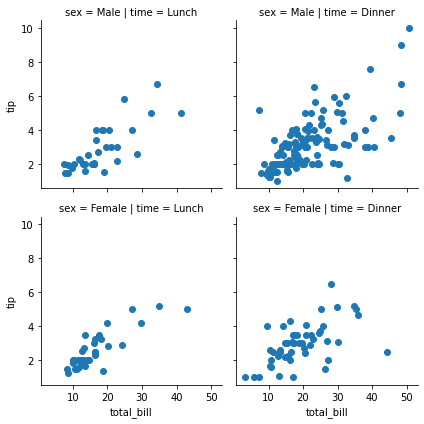

In [6]:
g = sns.FacetGrid(data = tips, col="time", row="sex")
g.map(plt.scatter, "total_bill", "tip");

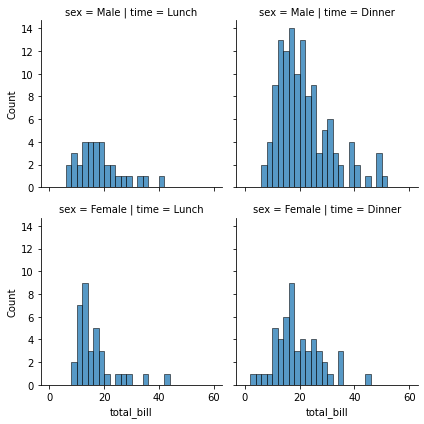

In [7]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map_dataframe(sns.histplot, x="total_bill", binwidth=2, binrange=(0, 60));

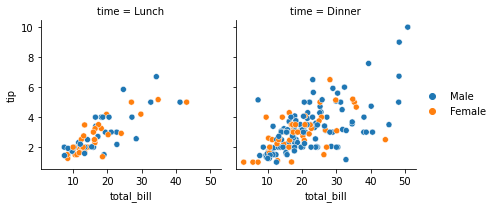

In [8]:
g = sns.FacetGrid(tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="sex")
g.add_legend();

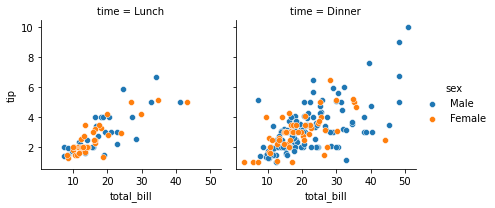

In [23]:
g = sns.FacetGrid(tips, col='time', hue='sex')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend();

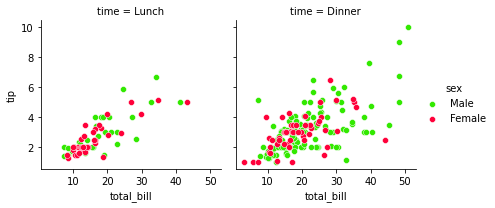

In [24]:
g = sns.FacetGrid(tips, col='time', hue='sex', palette='prism')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend();

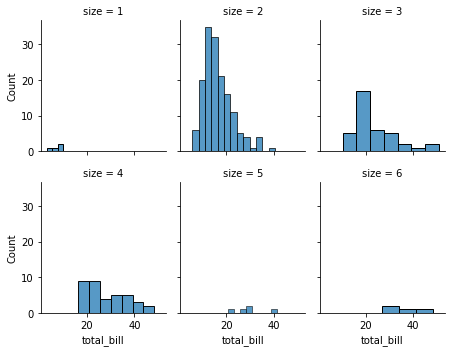

In [11]:
g = sns.FacetGrid(tips, col="size", height=2.5, col_wrap=3, aspect=.85)
g.map(sns.histplot, "total_bill");

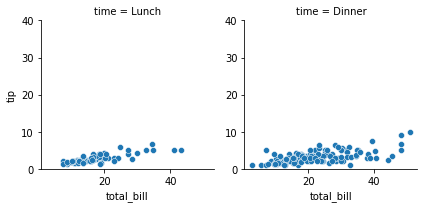

In [22]:
g = sns.FacetGrid(tips, col='time', sharey=False, ylim=(0, 40))

g.map_dataframe(sns.scatterplot, x='total_bill', y='tip');

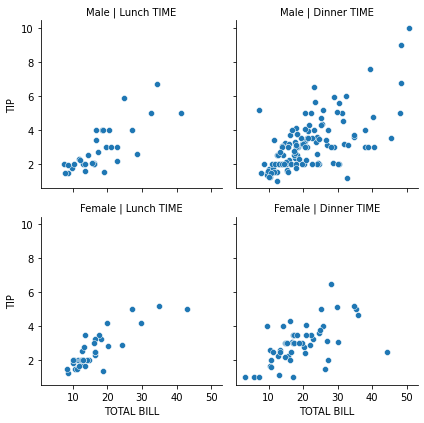

In [19]:
g = sns.FacetGrid(tips, col='time', row='sex')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels('TOTAL BILL', 'TIP')
g.set_titles(col_template='{col_name} TIME', row_template='{row_name}');

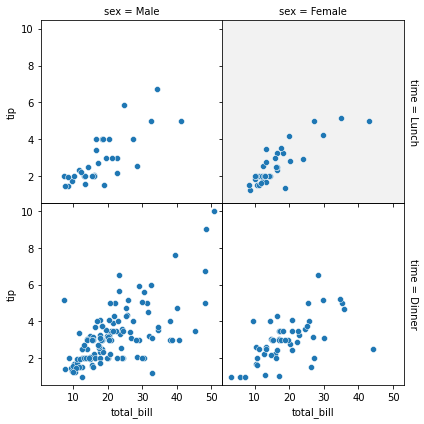

In [12]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.figure.subplots_adjust(wspace=0, hspace=0)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == "Lunch" and col_val == "Female":
        ax.set_facecolor(".95")
    else:
        ax.set_facecolor((0, 0, 0, 0))
        
# g.savefig("facet_plot.png")